In [1]:
%pylab inline
import numpy as np
import numba as nb
from scipy.signal import gaussian
from scipy.ndimage import filters

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Normalize using mean and std from full length time series
q_mean = 0.09647288335072611
q_std = 0.003311220773612503

@nb.njit
def conv_smoother(x,K):
    
    y = np.zeros_like(x)
    m = len(x)
    L = len(K)
    L2 = int(floor(L/2))
    
    for i in range(m):
        k0 = i-L2
        s = 0
        for j in range(L):
            if k0+j < 0 or k0+j>=m:
                pass
            else:
                y[i] = y[i] + x[k0+j]*K[j]
                s = s + K[j]
        y[i] = y[i] / s
        
    return (y-q_mean)/q_std

In [3]:
base_dir = '../POD/Psi_hat_to_CFD/Results/'
POD_results = np.load(base_dir + 'results_midEps.npy',allow_pickle=True).item()

base_dir = '../FFNN/Xi_to_CFD/Results/'
NN_results_8 = np.load(base_dir + 'results_test_r8.npy',allow_pickle=True).item()
NN_results_16 = np.load(base_dir + 'results_test_r16.npy',allow_pickle=True).item()
NN_results_32 = np.load(base_dir + 'results_test_r32.npy',allow_pickle=True).item()
NN_results_64 = np.load(base_dir + 'results_test_r64.npy',allow_pickle=True).item()

In [4]:
Cd_true = POD_results['Cd_true']
Cl_true = POD_results['Cl_true']

Cd_POD_8 = POD_results['Cd_8']
Cl_POD_8 = POD_results['Cl_8']
Cd_POD_16 = POD_results['Cd_16']
Cl_POD_16 = POD_results['Cl_16']
Cd_POD_32 = POD_results['Cd_32']
Cl_POD_32 = POD_results['Cl_32']
Cd_POD_64 = POD_results['Cd_64']
Cl_POD_64 = POD_results['Cl_64']

Cd_NN_8 = NN_results_8['Cd_NN']
Cl_NN_8 = NN_results_8['Cd_NN']
Cd_NN_16 = NN_results_16['Cd_NN']
Cl_NN_16 = NN_results_16['Cl_NN']
Cd_NN_32 = NN_results_32['Cd_NN']
Cl_NN_32 = NN_results_32['Cd_NN']
Cd_NN_64 = NN_results_64['Cd_NN']
Cl_NN_64 = NN_results_64['Cd_NN']

tau = POD_results['tau']
dt = POD_results['dt']
t = np.linspace(dt,tau,int(tau/dt))
n_samp = len(Cd_true)

In [5]:
f_peak = 1.4396011097007728
width_smoother = int(3/(f_peak*dt))
scale_smoother = int(0.5/(f_peak*dt))
smoother_kern = gaussian(width_smoother, scale_smoother)
smoother_kern = smoother_kern/np.sum(smoother_kern)

# Truncate and renormalize convolution at endpoints
q_true = [conv_smoother(Cd, smoother_kern) for Cd in Cd_true]

q_POD_8 = [conv_smoother(Cd, smoother_kern) for Cd in Cd_POD_8]
q_POD_16 = [conv_smoother(Cd, smoother_kern) for Cd in Cd_POD_16]
q_POD_32 = [conv_smoother(Cd, smoother_kern) for Cd in Cd_POD_32]
q_POD_64 = [conv_smoother(Cd, smoother_kern) for Cd in Cd_POD_64]

q_NN_8 = [conv_smoother(Cd, smoother_kern) for Cd in Cd_NN_8]
q_NN_16 = [conv_smoother(Cd, smoother_kern) for Cd in Cd_NN_16]
q_NN_32 = [conv_smoother(Cd, smoother_kern) for Cd in Cd_NN_32]
q_NN_64 = [conv_smoother(Cd, smoother_kern) for Cd in Cd_NN_64]

<Figure size 504x432 with 0 Axes>

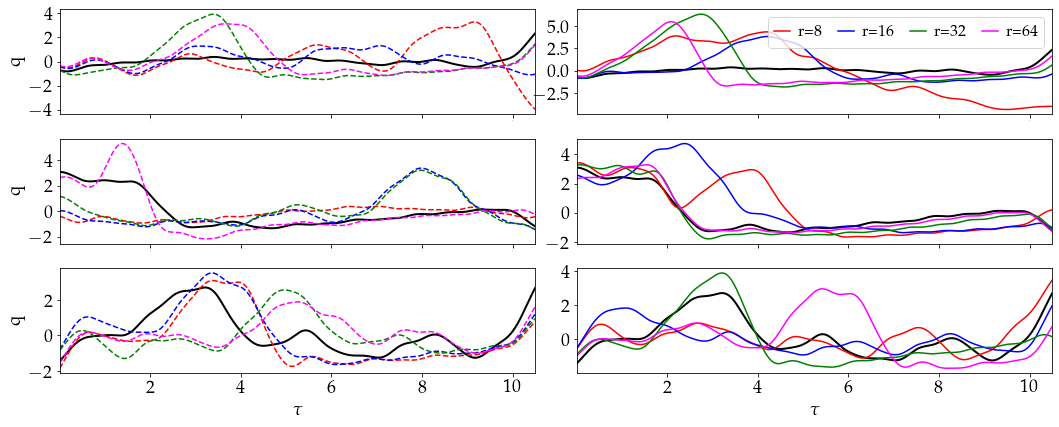

In [6]:
n_samples = 3

figure(figsize = (7,2*n_samples)) # If two columns
figure(figsize = (15,2*n_samples)) # If one column

label_fs = 18

for j in range(n_samples):
    
    sample_num = 24*j
    
    subplot(n_samples,2,2*j+1)
    plot(t,q_true[sample_num][1:], 'k', linewidth=2)
    plot(t,q_POD_8[sample_num][1:], linestyle='--', color='r', label='r=8')
    plot(t,q_POD_16[sample_num][1:], linestyle='--', color='b', label='r=16')
    plot(t,q_POD_32[sample_num][1:], linestyle='--', color='g', label='r=32')
    plot(t,q_POD_64[sample_num][1:], linestyle='--', color='magenta', label='r=64')
    
    xlim(t[0],t[-1])
    yticks(fontsize = label_fs)  
    ylabel('q', fontsize = label_fs)
    
    if j == n_samples-1:
        xticks(fontsize = label_fs)  
        xlabel(r'$\tau$', fontsize = label_fs)
    else:
        xticks(fontsize = 0) 
    
#     if j == 0: 
#         legend(loc = 'lower left', ncol=4, fontsize = label_fs-2, 
#                handlelength=1., columnspacing=1, handletextpad=0.5)
        
    ##################
    
    subplot(n_samples,2,2*j+2)
    plot(t,q_true[sample_num][1:], 'k', linewidth=2)
    plot(t,q_NN_8[sample_num][1:], linestyle='-', color='r', label='r=8')
    plot(t,q_NN_16[sample_num][1:], linestyle='-', color='b', label='r=16')
    plot(t,q_NN_32[sample_num][1:], linestyle='-', color='g', label='r=32')
    plot(t,q_NN_64[sample_num][1:], linestyle='-', color='magenta', label='r=64')
    
    xlim(t[0],t[-1])
    yticks(fontsize = label_fs)    
    
    if j == n_samples-1:
        xticks(fontsize = label_fs) 
        xlabel(r'$\tau$', fontsize = label_fs)
    else:
        xticks(fontsize = 0)  
        
    if j == 0: 
        legend(loc = 'upper right', ncol=4, fontsize = label_fs-2, 
               handlelength=1., columnspacing=1, handletextpad=0.5)
        
tight_layout()

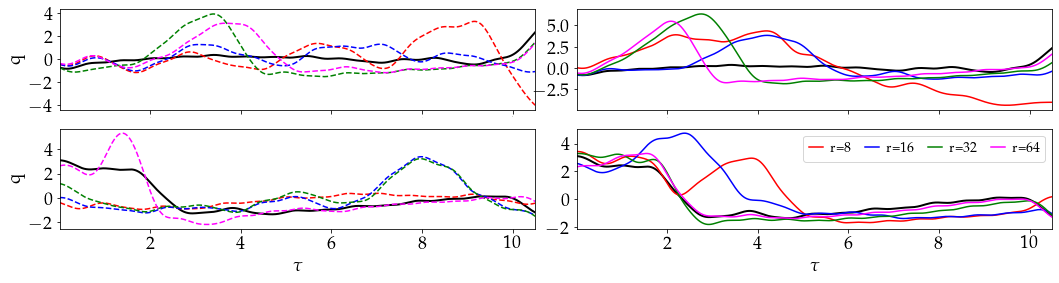

In [13]:
n_samples = 2
figure(figsize = (15,2*n_samples)) # If one column

label_fs = 18

for j in range(n_samples):
    
    sample_num = 24*j
    
    subplot(n_samples,2,2*j+1)
    plot(t,q_true[sample_num][1:], 'k', linewidth=2)
    plot(t,q_POD_8[sample_num][1:], linestyle='--', color='r', label='r=8')
    plot(t,q_POD_16[sample_num][1:], linestyle='--', color='b', label='r=16')
    plot(t,q_POD_32[sample_num][1:], linestyle='--', color='g', label='r=32')
    plot(t,q_POD_64[sample_num][1:], linestyle='--', color='magenta', label='r=64')
    
    xlim(t[0],t[-1])
    yticks(fontsize = label_fs)  
    ylabel('q', fontsize = label_fs)
    
    if j == n_samples-1:
        xticks(fontsize = label_fs)  
        xlabel(r'$\tau$', fontsize = label_fs)
    else:
        xticks(fontsize = 0) 
    
#     if j == 0: 
#         legend(loc = 'lower left', ncol=4, fontsize = label_fs-2, 
#                handlelength=1., columnspacing=1, handletextpad=0.5)
        
    ##################
    
    subplot(n_samples,2,2*j+2)
    plot(t,q_true[sample_num][1:], 'k', linewidth=2)
    plot(t,q_NN_8[sample_num][1:], linestyle='-', color='r', label='r=8')
    plot(t,q_NN_16[sample_num][1:], linestyle='-', color='b', label='r=16')
    plot(t,q_NN_32[sample_num][1:], linestyle='-', color='g', label='r=32')
    plot(t,q_NN_64[sample_num][1:], linestyle='-', color='magenta', label='r=64')
    
    xlim(t[0],t[-1])
    yticks(fontsize = label_fs)    
    
    if j == n_samples-1:
        xticks(fontsize = label_fs) 
        xlabel(r'$\tau$', fontsize = label_fs)
    else:
        xticks(fontsize = 0)  
        
    if j == 1: 
        legend(loc = 'upper right', ncol=4, fontsize = label_fs-4, 
               handlelength=1., columnspacing=1, handletextpad=0.5)
        
tight_layout()

In [8]:
Cd_POD_err_8 = np.mean([np.abs(Cd_true[j][1:] - Cd_POD_8[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)
Cd_POD_err_16 = np.mean([np.abs(Cd_true[j][1:] - Cd_POD_16[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)
Cd_POD_err_32 = np.mean([np.abs(Cd_true[j][1:] - Cd_POD_32[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)
Cd_POD_err_64 = np.mean([np.abs(Cd_true[j][1:] - Cd_POD_64[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)

Cd_NN_err_8 = np.mean([np.abs(Cd_true[j][1:] - Cd_NN_8[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)
Cd_NN_err_16 = np.mean([np.abs(Cd_true[j][1:] - Cd_NN_16[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)
Cd_NN_err_32 = np.mean([np.abs(Cd_true[j][1:] - Cd_NN_32[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)
Cd_NN_err_64 = np.mean([np.abs(Cd_true[j][1:] - Cd_NN_64[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)

Cl_POD_err_8 = np.mean([np.abs(Cl_true[j][1:] - Cl_POD_8[j][1:])/np.std(Cl_true[j][1:]) for j in range(n_samp)], axis=0)
Cl_POD_err_16 = np.mean([np.abs(Cl_true[j][1:] - Cl_POD_16[j][1:])/np.std(Cl_true[j][1:]) for j in range(n_samp)], axis=0)
Cl_POD_err_32 = np.mean([np.abs(Cl_true[j][1:] - Cl_POD_32[j][1:])/np.std(Cl_true[j][1:]) for j in range(n_samp)], axis=0)
Cl_POD_err_64 = np.mean([np.abs(Cl_true[j][1:] - Cl_POD_64[j][1:])/np.std(Cl_true[j][1:]) for j in range(n_samp)], axis=0)

q_POD_err_8 = np.mean([np.abs(q_true[j][1:] - q_POD_8[j][1:]) for j in range(n_samp)], axis=0)
q_POD_err_16 = np.mean([np.abs(q_true[j][1:] - q_POD_16[j][1:]) for j in range(n_samp)], axis=0)
q_POD_err_32 = np.mean([np.abs(q_true[j][1:] - q_POD_32[j][1:]) for j in range(n_samp)], axis=0)
q_POD_err_64 = np.mean([np.abs(q_true[j][1:] - q_POD_64[j][1:]) for j in range(n_samp)], axis=0)

q_NN_err_8 = np.mean([np.abs(q_true[j][1:] - q_NN_8[j][1:]) for j in range(n_samp)], axis=0)
q_NN_err_16 = np.mean([np.abs(q_true[j][1:] - q_NN_16[j][1:]) for j in range(n_samp)], axis=0)
q_NN_err_32 = np.mean([np.abs(q_true[j][1:] - q_NN_32[j][1:]) for j in range(n_samp)], axis=0)
q_NN_err_64 = np.mean([np.abs(q_true[j][1:] - q_NN_64[j][1:]) for j in range(n_samp)], axis=0)

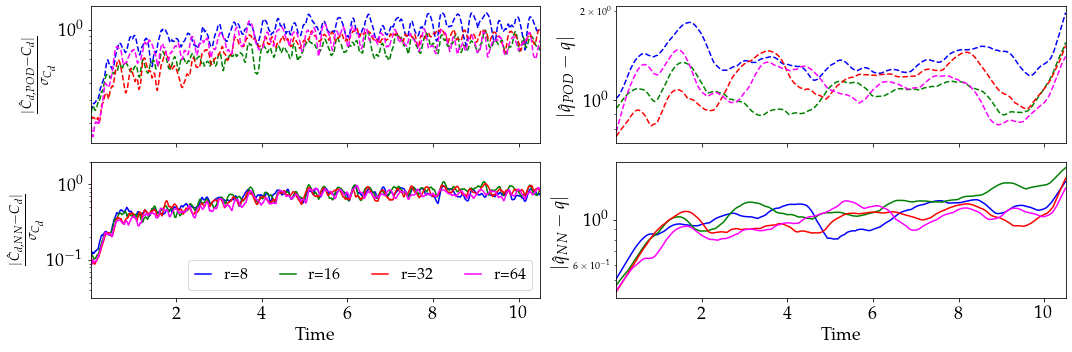

In [9]:
figure(figsize = (15,5))
label_fs = 18

subplot(2,2,1)
semilogy(t,Cd_POD_err_8, linestyle='--', color='b')
semilogy(t,Cd_POD_err_16, linestyle='--', color='g')
semilogy(t,Cd_POD_err_32, linestyle='--', color='r')
semilogy(t,Cd_POD_err_64, linestyle='--', color='magenta')
ylabel(r'$\frac{|\hat{C}_{d,POD} - C_d|}{\sigma_{C_d}}$', fontsize = label_fs)
xlim([t[0],t[-1]])
xticks(fontsize = 0)
yticks(fontsize = label_fs)

subplot(2,2,3)
semilogy(t,Cd_NN_err_8, 'b', label='r=8')
semilogy(t,Cd_NN_err_16, 'g', label='r=16')
semilogy(t,Cd_NN_err_32, 'r', label='r=32')
semilogy(t,Cd_NN_err_64, 'magenta', label='r=64')
xlim([t[0],t[-1]])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
xlabel(r'Time', fontsize = label_fs)
ylabel(r'$\frac{|\hat{C}_{d,NN} - C_d|}{\sigma_{C_d}}$', fontsize = label_fs)
ylim([10**-1.5, 2])
legend(loc = 'lower right', ncol=4, fontsize = label_fs-2, handlelength=1.)

subplot(2,2,2)
semilogy(t,q_POD_err_8, linestyle='--', color= 'b', label='r=10')
semilogy(t,q_POD_err_16, linestyle='--', color= 'g', label='r=25')
semilogy(t,q_POD_err_32, linestyle='--', color= 'r', label='r=100')
semilogy(t,q_POD_err_64, linestyle='--', color= 'magenta', label='r=500')
xlim([t[0],t[-1]])
xticks(fontsize = 0)
yticks(fontsize = label_fs)
ylabel(r'$|\hat{q}_{POD} - q|$', fontsize = label_fs)

subplot(2,2,4)
semilogy(t,q_NN_err_8, 'b', label='r=10')
semilogy(t,q_NN_err_16, 'g', label='r=25')
semilogy(t,q_NN_err_32, 'r', label='r=100')
semilogy(t,q_NN_err_64, 'magenta', label='r=500')
xlim([t[0],t[-1]])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
ylabel(r'$|\hat{q}_{NN} - q|$', fontsize = label_fs)
xlabel(r'Time', fontsize = label_fs)

tight_layout()

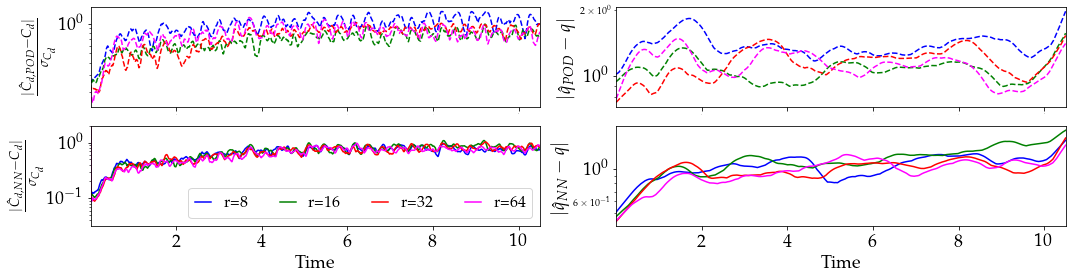

In [19]:
figure(figsize = (15,4))
label_fs = 18

subplot(2,2,1)
semilogy(t,Cd_POD_err_8, linestyle='--', color='b')
semilogy(t,Cd_POD_err_16, linestyle='--', color='g')
semilogy(t,Cd_POD_err_32, linestyle='--', color='r')
semilogy(t,Cd_POD_err_64, linestyle='--', color='magenta')
ylabel(r'$\frac{|\hat{C}_{d,POD} - C_d|}{\sigma_{C_d}}$', fontsize = label_fs)
xlim([t[0],t[-1]])
xticks(fontsize = 0)
yticks(fontsize = label_fs)

subplot(2,2,3)
semilogy(t,Cd_NN_err_8, 'b', label='r=8')
semilogy(t,Cd_NN_err_16, 'g', label='r=16')
semilogy(t,Cd_NN_err_32, 'r', label='r=32')
semilogy(t,Cd_NN_err_64, 'magenta', label='r=64')
xlim([t[0],t[-1]])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
xlabel(r'Time', fontsize = label_fs)
ylabel(r'$\frac{|\hat{C}_{d,NN} - C_d|}{\sigma_{C_d}}$', fontsize = label_fs)
ylim([10**-1.5, 2])
legend(loc = 'lower right', ncol=4, fontsize = label_fs-2, handlelength=1.)

subplot(2,2,2)
semilogy(t,q_POD_err_8, linestyle='--', color= 'b', label='r=10')
semilogy(t,q_POD_err_16, linestyle='--', color= 'g', label='r=25')
semilogy(t,q_POD_err_32, linestyle='--', color= 'r', label='r=100')
semilogy(t,q_POD_err_64, linestyle='--', color= 'magenta', label='r=500')
xlim([t[0],t[-1]])
xticks(fontsize = 0)
yticks(fontsize = label_fs)
ylabel(r'$|\hat{q}_{POD} - q|$', fontsize = label_fs)

subplot(2,2,4)
semilogy(t,q_NN_err_8, 'b', label='r=10')
semilogy(t,q_NN_err_16, 'g', label='r=25')
semilogy(t,q_NN_err_32, 'r', label='r=100')
semilogy(t,q_NN_err_64, 'magenta', label='r=500')
xlim([t[0],t[-1]])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
ylabel(r'$|\hat{q}_{NN} - q|$', fontsize = label_fs)
xlabel(r'Time', fontsize = label_fs)

tight_layout()